<h2> Introduction: CQF Deep Dive 2022 </h2>
<p> Made by Michelle S., Sophie E., Rohit M., and Daniel X. </p>

In [79]:
import pandas as pd
import numpy as np
# import plotly as plt
import matplotlib.pyplot as plt
import scipy.optimize as optimize

plt.rcParams["figure.figsize"] = (10, 7.5)

In [80]:
# calculating RSI
full_df = pd.read_csv("data/daily_uso.csv")
df = pd.DataFrame().assign(Date = full_df['Date'], Price = full_df['Price'])
window = 14

df['Diff'] = df['Price'].diff()
df['Gain'] = df['Diff'].clip(lower=0).round(2)
df['Loss'] = df['Diff'].clip(upper=0).abs().round(2)

df['Avg_Gain'] = df['Gain'].rolling(window=window, min_periods=window).mean()[:window + 1]
df['Avg_Loss'] = df['Loss'].rolling(window=window, min_periods=window).mean()[:window + 1]

# get WMS averages
# average gains
for i, row in enumerate(df['Avg_Gain'].iloc[window + 1:]):
    df['Avg_Gain'].iloc[i + window + 1] = (df['Avg_Gain'].iloc[i + window] * (window - 1) + \
                                           df['Gain'].iloc[i + window + 1]) / window
# average losses
for i, row in enumerate(df['Avg_Loss'].iloc[window + 1:]):
    df['Avg_Loss'].iloc[i + window + 1] = (df['Avg_Loss'].iloc[i + window] * (window - 1) + \
                                           df['Loss'].iloc[i + window + 1]) / window

# calculating RSI step 1, step 2
df['RS'] = df['Avg_Gain'] / df['Avg_Loss']
df['RSI'] = 100 - (100 / (1.0 + df['RS']))

print(df.head(20))
    

/Users/michellesun/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


            Date  Price  Diff  Gain  Loss  Avg_Gain  Avg_Loss        RS  \
0   Apr 22, 2022  76.31   NaN   NaN   NaN       NaN       NaN       NaN   
1   Apr 21, 2022  78.12  1.81  1.81  0.00       NaN       NaN       NaN   
2   Apr 20, 2022  77.24 -0.88  0.00  0.88       NaN       NaN       NaN   
3   Apr 19, 2022  76.86 -0.38  0.00  0.38       NaN       NaN       NaN   
4   Apr 18, 2022  80.41  3.55  3.55  0.00       NaN       NaN       NaN   
5   Apr 14, 2022  79.57 -0.84  0.00  0.84       NaN       NaN       NaN   
6   Apr 13, 2022  78.42 -1.15  0.00  1.15       NaN       NaN       NaN   
7   Apr 12, 2022  75.98 -2.44  0.00  2.44       NaN       NaN       NaN   
8   Apr 11, 2022  72.30 -3.68  0.00  3.68       NaN       NaN       NaN   
9   Apr 08, 2022  74.11  1.81  1.81  0.00       NaN       NaN       NaN   
10  Apr 07, 2022  73.11 -1.00  0.00  1.00       NaN       NaN       NaN   
11  Apr 06, 2022  73.05 -0.06  0.00  0.06       NaN       NaN       NaN   
12  Apr 05, 2022  74.80  

<Figure size 720x540 with 0 Axes>

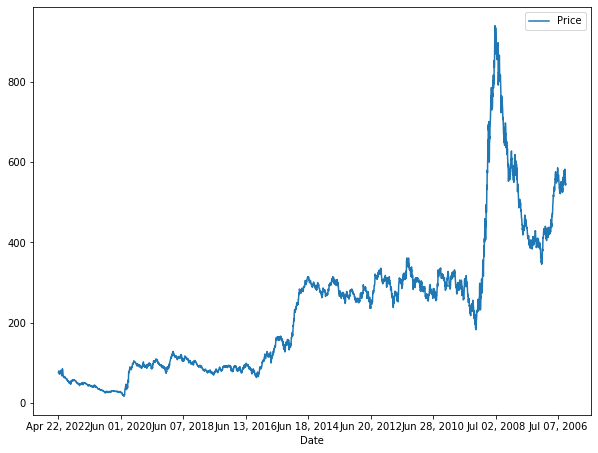

<Figure size 720x540 with 0 Axes>

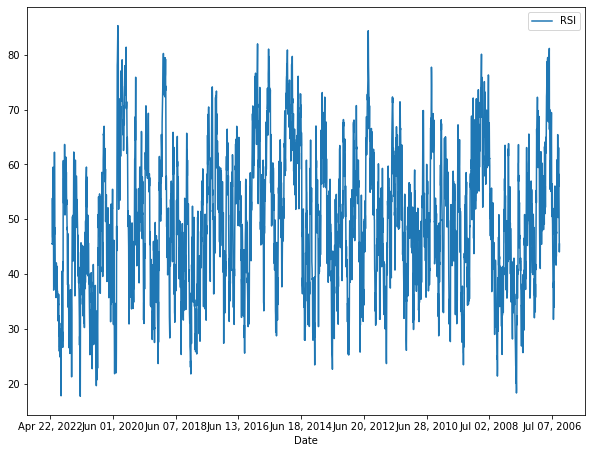

In [84]:
plt.figure()
df.plot('Date', 'Price')
plt.figure()
df.plot('Date', 'RSI')